Used: <br>
https://github.com/piyush2896/Facial-Expression-Recognition-Challenge/blob/master/Facial-Expression-Recognition-Challenge.ipynb <br>
https://habr.com/ru/company/ods/blog/325432/ <br>
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ <br>
https://mc.ai/your-first-dive-into-deep-learning/ <br>
Model 2 <br>
https://medium.com/themlblog/how-to-do-facial-emotion-recognition-using-a-cnn-b7bbae79cd8f <br>

In [546]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import json
import os
from IPython.display import display, clear_output
import copy

In [547]:
import warnings
warnings.filterwarnings('ignore')

### Get data

In [593]:
df_train = pd.read_csv('~/GitData/EmotionalRecChallenge/train.csv', index_col = 'id')
df_test = pd.read_csv('~/GitData/EmotionalRecChallenge/test.csv', index_col = 'id')

In [594]:
df_train.columns, df_test.columns

(Index(['pixels', 'target'], dtype='object'),
 Index(['pixels'], dtype='object'))

In [595]:
df_train.isnull().sum()

pixels    0
target    0
dtype: int64

### Pixels to png, i made it because i want see it :) 

In [551]:
from tqdm import tqdm_notebook as tqdm
import matplotlib
import matplotlib.cm as cm

Every 48 values we have new string,  48х48 matrix

In [ ]:
for item in tqdm(X_train, desc = 'Image:'):
    #preparing place from image
    pxl_str = np.fromstring(item, dtype=int, sep=' ')
    pxl_img = np.zeros((48,48))
    #create img
    for x in range( 48, len(pxl_str), 48):        
        pxl_img[x/48] = pxl_str[x-48:x]
    #Save img in grayscale
    matplotlib.image.imsave('raw/Training/'+str(X_train[X_train == item].index[0])+'.png', pxl_img, 
                            cmap=cm.Greys_r)   

### Split Data

In [562]:
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

For train data

In [596]:
df_pixels = df_train['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
X_train = np.vstack(df_pixels.values)
y_train = np.array(df_train["target"])
X_train.shape, y_train.shape

((28709, 2304), (28709,))

In [598]:
X_train, X_test, y_train_c, y_test_c = train_test_split(X_train, y_train,
                                                   test_size = 0.2,
                                                   random_state=1)

In [565]:
y_train = np_utils.to_categorical(y_train_c)
y_test = np_utils.to_categorical(y_test_c)
y_train.shape, y_test.shape

((22967, 7), (5742, 7))

In [600]:
y_train = y_train_c[:]
y_test = y_test_c[:]

In [601]:
X_train.shape, X_test.shape

((22967, 2304), (5742, 2304))

In [602]:
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)
X_train.shape, X_test.shape

((22967, 48, 48, 1), (5742, 48, 48, 1))

In [603]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                   test_size = 0.2,
                                                   random_state=1)

Using augmentation

In [604]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [607]:
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, y_train,
                                     batch_size=200,
                                     shuffle=True)

valid_datagen.fit(X_valid)
valid_generator = valid_datagen.flow(X_valid, y_valid, 
                                     batch_size=200)   

In [608]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen.fit(X_test)
test_generator = test_datagen.flow(X_test, y_test, 
                                   batch_size=200)

For out data

In [609]:
df_pixels_final = df_test['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
X_final = np.vstack(df_pixels_final.values)
X_final.shape

(7178, 2304)

In [610]:
X_final = X_final.reshape(-1, 48, 48, 1)
X_final.shape

(7178, 48, 48, 1)

In [611]:
final_datagen = ImageDataGenerator(rescale=1./255)
final_datagen.fit(X_final)
final_generator = final_datagen.flow(X_final)

### Show results

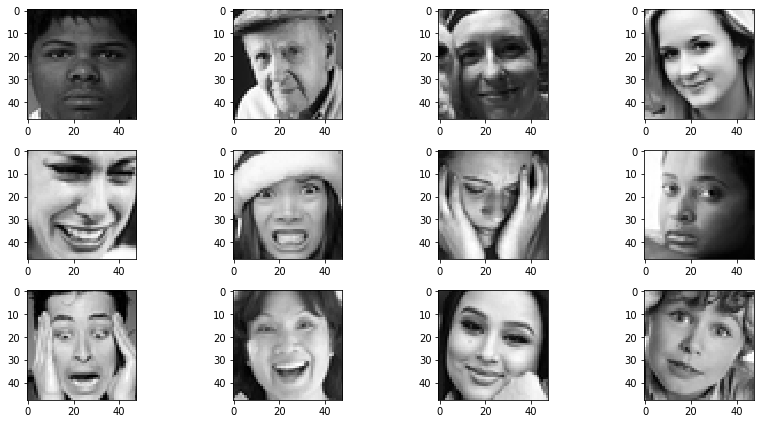

In [353]:
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(X_train[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

### Save to CSV

###  Try use GPU (have problem with training on GPU)

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [ ]:
#del tensorflow
#del tf
#del keras

In [ ]:
tf.test.gpu_device_name(), tf.test.is_gpu_available()


In [ ]:
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()

In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7783961491485526775
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10274628969457095810
physical_device_desc: "device: XLA_CPU device"
]


In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

import keras
import tensorflow as tf
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


### Use CPU

In [15]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

###  Plot after each epoch

### Keras convNN

In [17]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from keras.regularizers import l2

from keras.models import load_model
from keras.models import model_from_json

from IPython.display import clear_output

In [242]:
class TrainingPlot(Callback):
    
    def __init__(self, hist_old=None):
        # Initialize the lists for holding the logs, losses and accuracies
        if hist_old is None:
            self.losses = []
            self.acc = []
            self.val_losses = []
            self.val_acc = []
            self.logs = []
            self.hist_old = None
            self.history = {}
        else:
            self.hist_old = []
            self.losses = []
            self.acc = []
            self.val_losses = []
            self.val_acc = []
            self.history = {}
            # Append old and new history 
            self.hist_old.append(hist_old)
            self.losses = hist_old.losses[:]
            self.acc = hist_old.acc[:]
            self.val_losses = hist_old.val_losses[:]
            self.val_acc = hist_old.val_acc[:]
        
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        #self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            min_eph_val_loss = np.argmin(self.val_losses)
            max_eph_val_loss = np.argmax(self.val_losses)
            min_value_val_loss = min(self.val_losses)
            max_value_val_loss = max(self.val_losses)
            
            min_eph_val_acc = np.argmin(self.val_acc)
            max_eph_val_acc = np.argmax(self.val_acc)
            min_value_val_acc = min(self.val_acc)
            max_value_val_acc = max(self.val_acc)
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            
            plt.figure(figsize=(20,6))
            plt.style.use("seaborn-dark-palette")
            # Return default style
            #plt.style.use('classic') 
            plt.subplot(1, 2, 1)            
            plt.plot(N, self.losses, label = "train_loss")            
            plt.plot(N, self.val_losses, label = "val_loss")            
            plt.scatter(min_eph_val_loss, min_value_val_loss, color='red', s=40, marker='o',
                        label= 'Min '+ str(round(min_value_val_loss,2))+' at '+str(min_eph_val_loss)+' epoch')
            
            plt.title("Training Loss [Epoch {}]".format(N[-1]))
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.grid(linewidth=0.2)
            plt.legend(loc='best')
            
            plt.subplot(1, 2, 2)
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_acc, label = "val_acc")                    
            plt.scatter(max_eph_val_acc, max_value_val_acc, color='red', s=40, marker='o',
                        label= 'Max '+ str(round(max_value_val_acc, 2)) + ' at '+str(max_eph_val_acc)+' epoch')
            
            plt.title("Training Accuracy [Epoch {}]".format(N[-1]))
            plt.xlabel("Epochs")
            plt.ylabel("Accuracy")
            plt.legend(loc='best')
            plt.grid(linewidth=0.2)
            plt.show()   
           
    def on_train_end(self, logs={}):
        self.history = {'acc': self.acc, 'loss': self.losses,
                        'val_acc' : self.val_acc, 'val_loss': self.val_losses}        


### Layers

### Load Model

In [23]:
json_file = open('0.584_on_test_model2.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

model2.load_weights("0.584_on_test_model2.h5")
print("Loaded model from disk")

Loaded model from disk


### Model 1

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(48, 48,1)))
model.add(Activation("relu"))

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))

model.add(Dense(7))
model.add(Activation('softmax'))
#model.summary()

In [ ]:
model.compile(Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
# Model 1 plot and write history
hist1 = TrainingPlot()

### Let's fit model


In [ ]:
#early stop
early_stopping=EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# num epochs
epochs = 1

# run model
model.fit(X_train, y_train, epochs=epochs,
                 shuffle=True,
                 callbacks=[hist1],
                 batch_size=512, validation_split=0.2)


In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Calculate accuracy 

In [56]:
score = model.evaluate(X_test, y_test, verbose=0)

NameError: name 'model' is not defined

In [57]:
print(model.metrics_names)
print(score)

NameError: name 'model' is not defined

### Save model 1


In [ ]:
model_file_name = '0.598'
# save best weights
model.save_weights(model_file_name +"_model.h5")

# save model to json
model_json = model.to_json()
with open(model_file_name+"_model.json", "w") as json_file:
    json_file.write(model_json)

# save description
with open(model_file_name+ "_model.txt", "w") as txt_file:
    txt_file.write('model.compile(Adam(1e-4), loss=\'categorical_crossentropy\', metrics=[\'accuracy\']) \
    shuffle=True, batch_size=100, validation_split=0.2, epoch = 254, val_acc = 0.5684, acc = 0.5669, \
                  accuracy_score(y_test_c, np.argmax(model.predict(X_test), axis=1)) = 0.5827')

### Model 2 

In [613]:
# Model 2 plot and write history
hist2 = TrainingPlot()

### Load Model

In [358]:
json_file = open('SmallerCNN_22.06.2019/0.619(public)/SmallerCNN_22.06.2019_model2.json', 'r')
# load model
loaded_model_json = json_file.read()
json_file.close()
model2 = model_from_json(loaded_model_json)
# load weights
model2.load_weights("SmallerCNN_22.06.2019/0.619(public)/SmallerCNN_22.06.2019_model2.h5")
# load history
json_hist = open('SmallerCNN_22.06.2019/0.619(public)/SmallerCNN_22.06.2019_model2_hist.json', 'r')
loaded_hist_json = json_hist.read()
json_hist.close()
hist2.history = json.loads(loaded_hist_json)
        
print("Loaded model, weight and history from disk")

Loaded model, weight and history from disk


In [614]:
num_labels = 7
width, height = 48, 48

model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), 
                  data_format='channels_last', kernel_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
#model2.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))

#model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model2.add(Dropout(0.5))
"""
model2.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Dropout(0.5))
"""
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.4))
#model2.add(Dense(16, activation='relu'))
#model2.add(Dropout(0.5))

model2.add(Dense(num_labels, activation='softmax'))
#model.summary()

In [615]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_139 (Bat (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_140 (Bat (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 23, 23, 64)        18496     
__________

### Let's fit model


Trainning be so long but constantly going forward

In [622]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

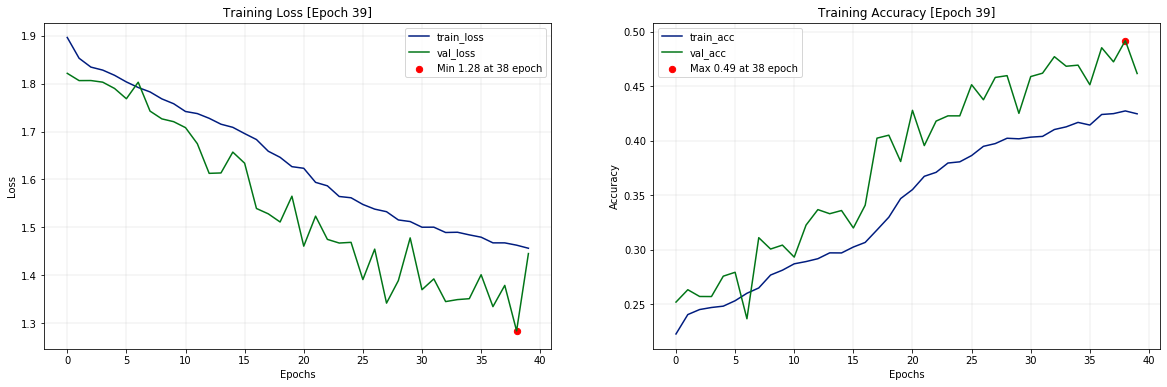

In [632]:
batch_size = 512
epochs = 39
#early stop
#early_stopping=EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model2.fit_generator(train_generator,
                  steps_per_epoch=len(X_train) / 32,
                  epochs=epochs,
                  verbose=1,
                  callbacks=[hist2],
                  validation_data= valid_generator,
                  validation_steps= len(X_valid) / 32,
                  shuffle=True)

In [627]:
len(X_train) / 128

143.5390625

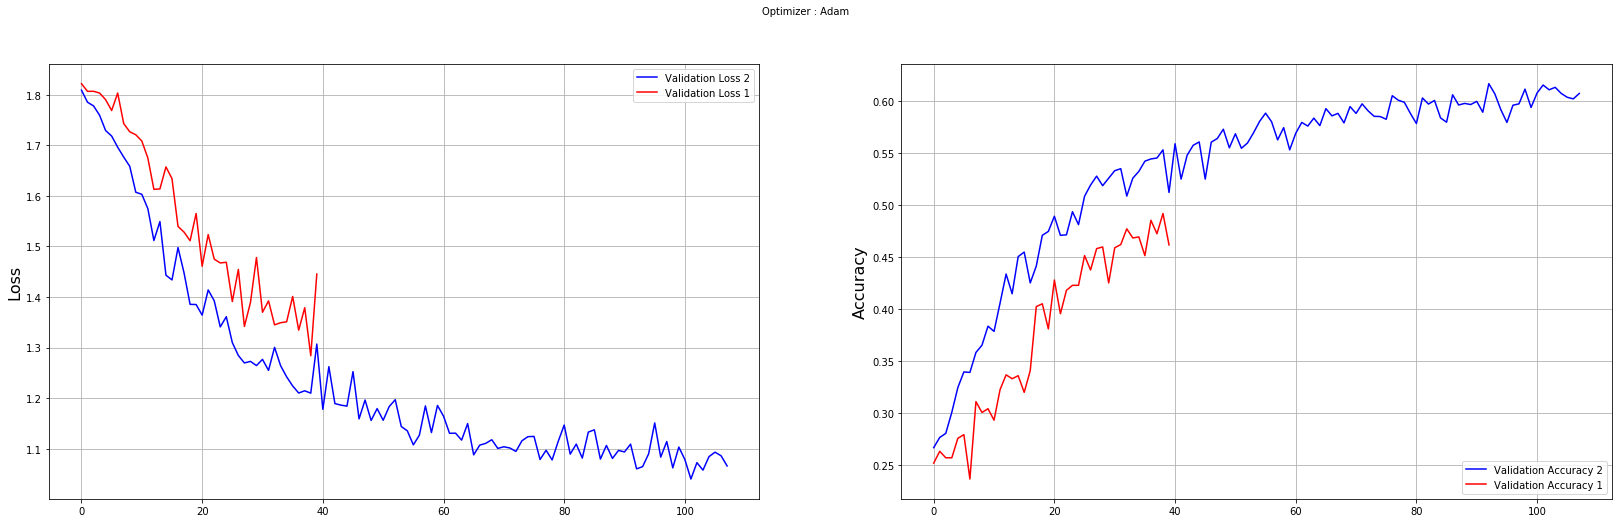

In [633]:
 def plot_history_val(hist, hist2):
    plt.figure(figsize=(28,8))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(hist2.history['val_loss'], color='b', label='Validation Loss 2')
    plt.plot(hist.history['val_loss'], color='r', label='Validation Loss 1')
    plt.grid()
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(hist2.history['val_acc'], color='b', label='Validation Accuracy 2')
    plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy 1')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_history_val(hist2, hist)    

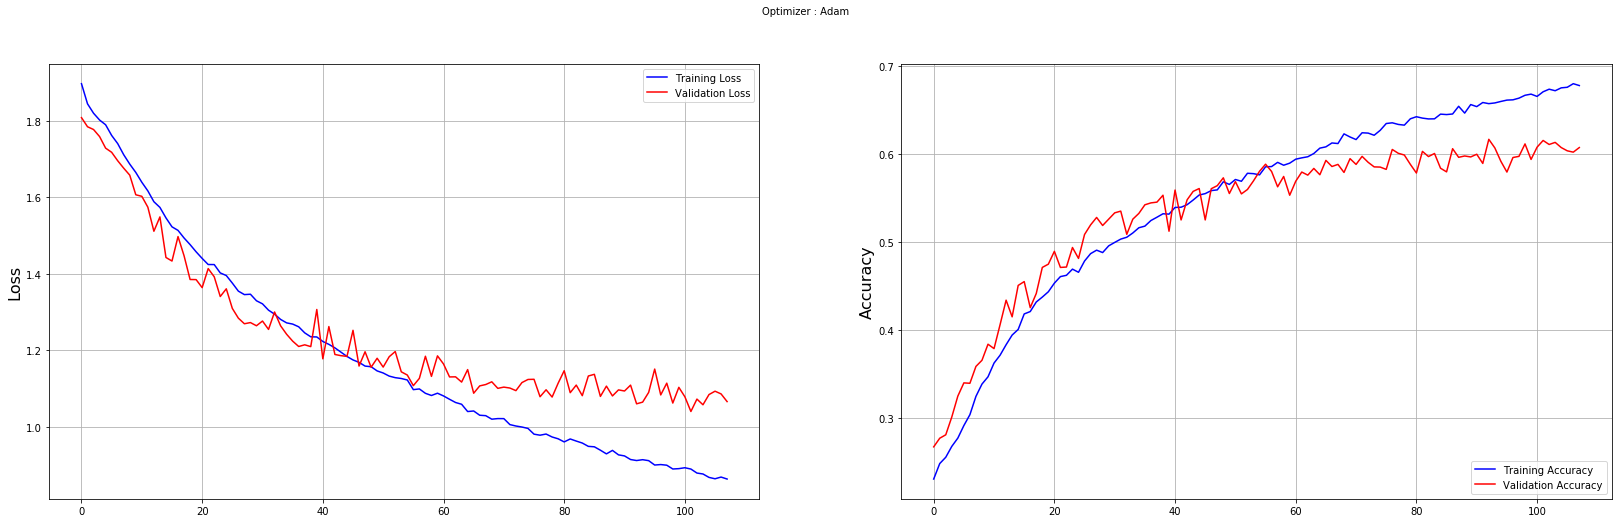

In [361]:
 def plot_history(hist):
    plt.figure(figsize=(28,8))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(hist.history['loss'], color='b', label='Training Loss')
    plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
    plt.grid()
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
    plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
plot_history(hist) 

### Calculate accuracy 

In [634]:
test_loss, test_acc = model2.evaluate_generator(test_generator, steps= len(test_generator))

In [635]:
print('test_loss: ', round(test_loss, 2))
print('test_acc: ', round(test_acc, 2))

test_loss:  1.44
test_acc:  0.45


In [636]:
accuracy_score(y_test, model2.predict_classes(X_test))

0.23180076628352492

In [637]:
accuracy_score(y_test, np.argmax(model2.predict(X_test), axis=1))

0.23180076628352492

### Save model 2


In [496]:
model2_file_name = 'GenCNN_25.06.2019'
model2_score = '0.62(test)'
#create folder
newpath = model2_file_name + '/' + model2_score 
if not os.path.exists(newpath):
    os.makedirs(newpath)
# save best weights
model2.save_weights(model2_file_name + '/'+ model2_score + '/' + model2_file_name + "_model2.h5")

# save model to json
model2_json = model2.to_json()
with open(model2_file_name + '/' + model2_score + '/' + model2_file_name + "_model2.json", "w") as json_file:
    json_file.write(model2_json)
# save history
hist_json = json.dumps(hist2.history)
with open(model2_file_name + '/' + model2_score + '/' + model2_file_name + "_model2_hist.json", "w") as json_file:
    json_file.write(hist_json)    
# save description
%save -f 'GenCNN_25.06.2019/0.62(test)/'model2_file_name 1-999999
clear_output()
print('All files saved')

All files saved


### Prepare output data

In [497]:
data_final = np.argmax(model2.predict(X_final), axis=1)

In [589]:
data_final = np.argmax(model2.predict_generator(final_generator, steps= len(final_generator)), axis=1)

In [590]:
data_final

array([6, 3, 6, ..., 3, 4, 3])

In [591]:
final_dataframe = pd.DataFrame(data_final.T, index = df_test.index)
final_dataframe.columns = ['target']
final_dataframe.head(1)

,target
id,
28709,6


In [592]:
final_dataframe.to_csv(newpath + '/' +'EmotionalRecognition_25.06.2019_20:33.csv', index='False')
final_dataframe.head()

,target
id,
28709,6
28710,3
28711,6
28712,6
28713,3
